<a href="https://colab.research.google.com/github/jaeyoonjeong9024/7weeks/blob/main/ALCOHOL_SALE_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np # 숫자 배열 처리를 위한 라이브러리
import pandas as pd # 데이터 프레임(표) 처리를 위한 라이브러리
import tensorflow as tf # 딥러닝 모델(RNN)을 위한 라이브러리
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화를 위한 기능
from sklearn.metrics import mean_absolute_error, mean_squared_error # MAE, MSE 성능 평가 함수
import matplotlib.pyplot as plt # 그래프 시각화 라이브러리
import warnings # 경고 메시지 제어

warnings.filterwarnings('ignore') # 경고 메시지 숨기기

# 1. 데이터 로드
df = pd.read_csv('Alcohol_Sales.csv') # CSV 파일을 pandas DataFrame으로 읽기
data = df['S4248SM144NCEN'].values.reshape(-1, 1) # 특정 열의 값만 numpy 배열로 추출 (2차원)

In [41]:
# 2. 정규화
scaler = MinMaxScaler() # 0~1 사이 값으로 변환하는 스케일러 준비
data_scaled = scaler.fit_transform(data) # 데이터를 0~1 사이로 정규화(스케일링)

In [42]:
# 3. 시퀀스 생성 및 훈련/테스트 데이터 분리
window = 12 # 12개월치 데이터를 기반으로 예측
X, y = [], [] # X(문제지), y(정답지) 리스트 생성

for i in range(len(data_scaled) - window): # 데이터 끝까지 12개씩 묶기
    X.append(data_scaled[i:i+window]) # i부터 12개(window)를 X에 추가
    y.append(data_scaled[i+window]) # 12번째 다음 데이터를 y에 추가

X, y = np.array(X), np.array(y) # 리스트를 numpy 배열로 변환

# 80% 훈련, 20% 테스트 분리
split_index = int(len(X) * 0.8) # 80% 지점 계산

X_train, X_test = X[:split_index], X[split_index:] # 훈련용/테스트용 문제지 분리
y_train, y_test = y[:split_index], y[split_index:] # 훈련용/테스트용 정답지 분리

In [36]:
# 4. SimpleRNN 모델 정의 및 훈련
model_rnn = tf.keras.Sequential([ # 순차적 모델 생성
    # SimpleRNN 층 (유닛 64개), 입력 형태는 (12, 1)
    tf.keras.layers.SimpleRNN(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1) # 1개의 숫자를 출력하는 최종 층
])

# 모델 설정 (최적화: adam, 손실 함수: mse)
model_rnn.compile(optimizer='adam', loss='mse')

history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))

print("SimpleRNN 모델 훈련 완료.")

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0423 - val_loss: 0.0331
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0116
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0134
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0117
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0138
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0129
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0143
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6975e-04 - v

In [37]:
pred_scaled = model_rnn.predict(X_test)

mse_scaled = mean_squared_error(y_test, pred_scaled)
mae_scaled = mean_absolute_error(y_test, pred_scaled)

pred_inv = scaler.inverse_transform(pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)

mse_actual = mean_squared_error(y_test_inv, pred_inv)
mae_actual = mean_absolute_error(y_test_inv, pred_inv)

print("\n--- 1. 0~1 정규화 스케일 성능 ---")
print(f"Test MSE (0~1 Scale): {mse_scaled:.6f}")
print(f"Test MAE (0~1 Scale): {mae_scaled:.6f}")

print("\n--- 2. 실제 판매량 스케일 성능 (해석용) ---")
print(f"Test MSE (Actual Scale): {mse_actual:.2f}")
print(f"Test MAE (Actual Scale): {mae_actual:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

--- 1. 0~1 정규화 스케일 성능 ---
Test MSE (0~1 Scale): 0.004216
Test MAE (0~1 Scale): 0.055000

--- 2. 실제 판매량 스케일 성능 (해석용) ---
Test MSE (Actual Scale): 655871.31
Test MAE (Actual Scale): 686.02


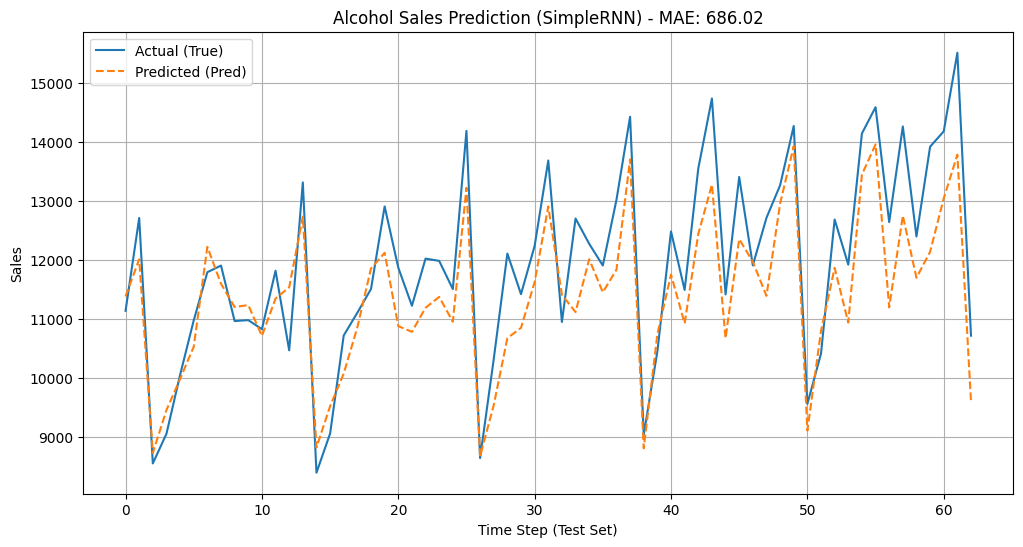

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual (True)')
plt.plot(pred_inv, label='Predicted (Pred)', linestyle='--')
plt.title(f'Alcohol Sales Prediction (SimpleRNN) - MAE: {mae_actual:.2f}')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.savefig('alcohol_sales_prediction_rnn.png')